# INTRODUCTION OF DATASET 
The DataSet is taken from the Bank Marketing campaigns (phone calls) of a Portuguese banking institution which consists of multivariate characteristics,17 attributes, 45211 instances

**Term Deposit**

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

**BUSINESS PROBLEM:** Finding out the characteristics that are helping Bank to make customers successfully subscribe for deposits, which helps in increasing campaign efficiently and selecting high value customers.

**AIM of the Project**

The Aim is to predict if the client will subscribe a term deposit and identify factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit.        

**Dataset Information**

There are two datasets:
1) bank-full.csv with all examples and 17 inputs, ordered by date.
2) bank.csv with 10% of the examples and 17 inputs, randomly selected from bank-full data.

**Attributes Explanation**

**Input variables:**
**age, job, marital, education** are self explanatory

**default**: Does the customer have credit in default

**Balance**: Balance of the customer

**housing**: Does the customer have a housing loan

**loan**: Does the customer have a personal loan

**Related with the last contact of the current campaign:**

**Contact**: contact communication type

**Month**: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

**day_of_week**: last contact day of the week ("mon","tue","wed","thu","fri")

**Duration**: last contact duration, in seconds.

 *Important note:*  this attribute highly affects the output target (e.g., if duration=0 then y="no").

**Other attributes:**

**Campaign**: Number of contacts performed during this campaign and for this client includes last contact

**pdays**: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

**Previous**: number of contacts performed before this campaign and for this client

**poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Outcome variable:**

**y** - has the client subscribed to a term deposit? ("yes","no")

*In total there are 16 independant and 1 dependant varible*

**Importing Libraries**

In [1]:
# for analysis of data importing necessary libraries
import numpy as np  # linear algebra
import pandas as pd # For data analysis and data manipulation.
import matplotlib.pyplot as plt  # This library is built on the top of NumPy arrays and consist of several plots like line chart, bar chart, histogram, etc.
import seaborn as sns # Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

In [2]:
import warnings
warnings.filterwarnings('ignore')  # This method will ignore all warnings.

**Basic Exploration**

In [3]:
bank_full=pd.read_csv('bank-full.csv',sep=';') # reading the bankfull dataset using pandas and use separater

In [4]:
bank_full.shape # to check rows and columns

(45211, 17)

**Obervation**

*   number of observations(rows) in bank_full dataset = 45211
*   number of variables(columns) in bank_full dataset = 17

In [5]:
bank=pd.read_csv('bank.csv',sep=';') # reading the bank dataset using pandas and use separater

In [6]:
bank.shape # to check rows and columns in randomly selected dataset

(4521, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Obervation**

*   number of observations(rows) in bank dataset = 4521
*   number of variables(columns) in bank dataset = 17

*Merging bank_full and bank datasets into a single dataframe and to perform further analysis*

In [8]:
bank_marketing=pd.concat([bank_full,bank],ignore_index=True) # merging both datasets

In [9]:
bank_marketing.shape # after merging datasets shape 

(49732, 17)

In [10]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


**Data Cleaning**

In [11]:
bank_marketing = bank_marketing.drop_duplicates() # dropping the dublicates from the bank_marketing dataset

In [12]:
bank_marketing.shape # after removing duplicates shape

(45211, 17)

Merging both datasets will only lead to duplication so bank dataset is derived from bank_full dataset so our main dataframe bank_marketing has 45211 rows and 17 columns.

In [13]:
bm=bank_marketing.copy() # creating a copy of main dataframe into new one 'bm'

In [14]:
bm.info() # for getting information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


**Obervation :**

objects variables = 10

numericals variables = 7

If we observe the datatype of day variable is incorrect, it should be category datatype as it is day of the week and also few columns are showing as object instead of category.

In [15]:
bm.nunique() # getting unique values

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


*   There is no feature with unique value

In [16]:
col = ['job','marital','education','default','housing','loan','contact','month','poutcome','y'] # columns for conversion which are showing as object dataypes
bm[col]=bm[col].astype('category') # converting columns into category because day column given numerical
bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.2 MB


*So we can observe we have 11 categorical variables and 6 numerical columns*

In [17]:
bm.isnull().sum() # to check missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*We have Zero missing values in dataframe*

In [18]:
bm.describe() # shows the numerical columns with statistical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
bm.describe(include='category')  # shows the categorical columns with statistical data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [20]:
bm.columns # to show column name in dataframe

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Categorical Variables:**                   
1. Job
2. Marital
3. Education
4. Default
5. Housing
6. Loan
7. Contact
8. month
9. poutcome
10. y

---
**Numerical Variables:**
1. Age
2. Balance
3. Duration
4. Campaign
5. Pdays
6. Previous
7. day




# EDA

**Univariate Analysis**

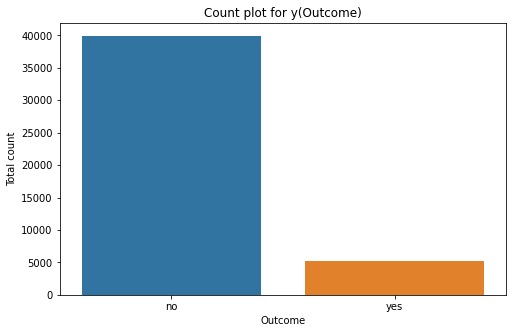

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='y', data=bm) # x axis is y column.
plt.title("Count plot for y(Outcome)") # title of the count plot
plt.xlabel("Outcome")
plt.ylabel("Total count")
plt.show()

The Outcome variable is categorical column so count plot is best so if we observe the ratio of no category is more nearly 40k whereas yes category is close to 5k which is highly imbalanced.

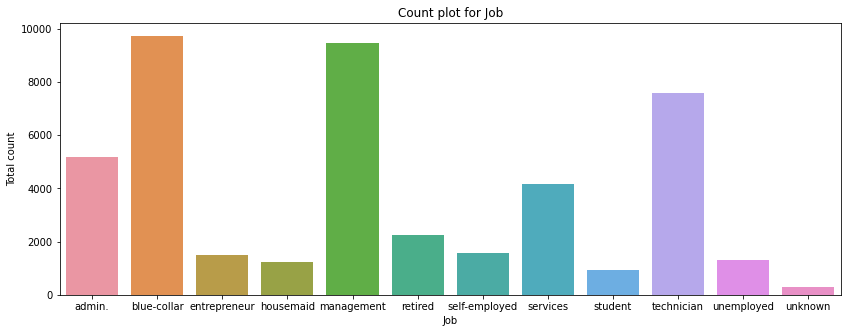

In [ ]:
# Marking figures size. 
plt.figure(figsize=(14,5))

## Adding title and labels for x and y axis
sns.countplot(x='job', data=bm) # x axis is job column.
plt.title("Count plot for Job") # title of the count plot
plt.xlabel("Job")
plt.ylabel("Total count")
plt.show()

From the above plot we can observe that Client with blue-collar,management and technician jobs have been contacted more by the bank which are more than 6k and unknown being the least contacted by bank followed with student,housemaid.

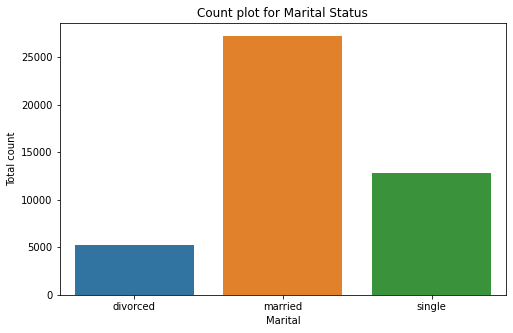

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='marital', data=bm) # x axis is marital column.
plt.title("Count plot for Marital Status") # title of the count plot
plt.xlabel("Marital")
plt.ylabel("Total count")
plt.show()

From the plot, we can identify Client who are married are contacted more by the bank and divorced Client have been contacted least.

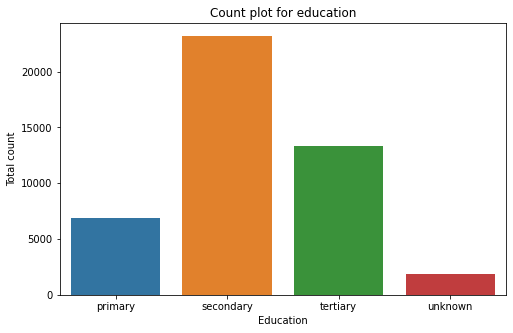

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='education', data=bm) # x axis is marital column.
plt.title("Count plot for education") # title of the count plot
plt.xlabel("Education")
plt.ylabel("Total count")
plt.show()

If we observe the plot, secondary education is high in value so it shows that bank has contacted Client with secondary education and not contacted who education is unknown.

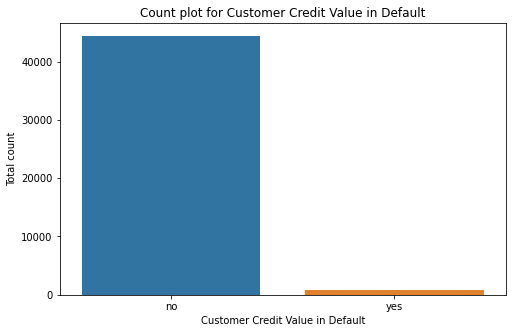

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='default', data=bm) # x axis is marital column.
plt.title("Count plot for Customer Credit Value in Default") # title of the count plot
plt.xlabel("Customer Credit Value in Default")
plt.ylabel("Total count")
plt.show()

The plot shows the client with default status as ‘no’ are the most who have been contacted by the bank for the deposits. Client with default status ‘yes’ have not been contacted by the bank at all.

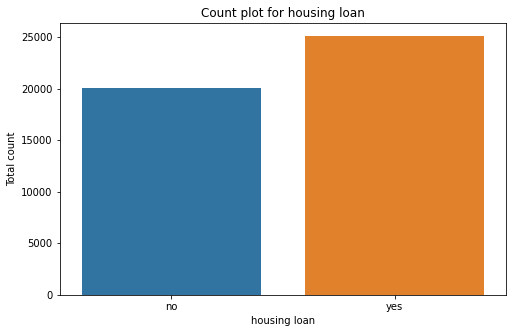

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='housing', data=bm) # x axis is y column.
plt.title("Count plot for housing loan") # title of the count plot
plt.xlabel("housing loan")
plt.ylabel("Total count")
plt.show()

By looking at the plot we understand that bank has contacted client who has housing loan and also contacted client who don't have house loan.

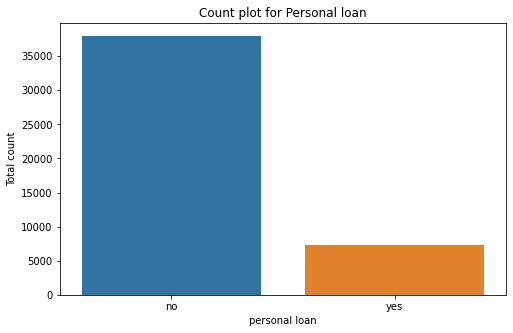

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='loan', data=bm) # x axis is y column.
plt.title("Count plot for Personal loan") # title of the count plot
plt.xlabel("personal loan")
plt.ylabel("Total count")
plt.show()

Client with no personal loan are the most ones who have been contacted by the bank for the deposits. Very few client with personal loan are contacted by the bank for the deposits.

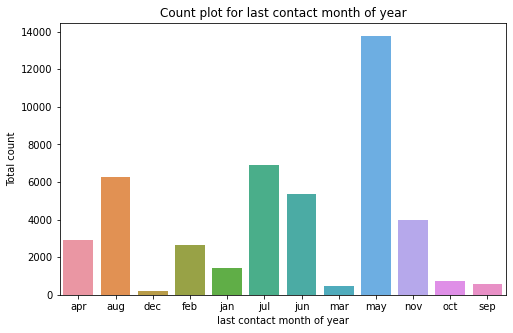

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='month', data=bm) # x axis is y column.
plt.title("Count plot for last contact month of year") # title of the count plot
plt.xlabel("last contact month of year")
plt.ylabel("Total count")
plt.show()

The Clients have been contacted majorly in the month of may followed by july and august. Bank has least contacted the clients in the december followed by march,september and october.

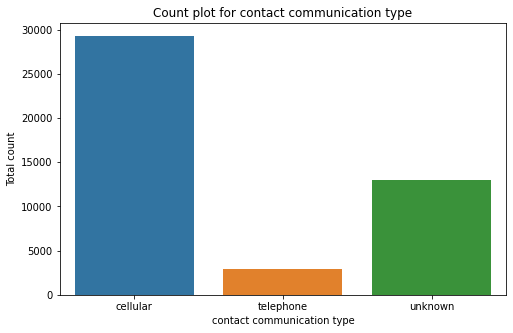

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='contact', data=bm) # x axis is y column.
plt.title("Count plot for contact communication type") # title of the count plot
plt.xlabel("contact communication type")
plt.ylabel("Total count")
plt.show()

The Plot explains bank has contacted clients mostly through cellular communication and least contacted through telephone communication. Also, there are nearly 14k clients who's communication is not available to make contact.

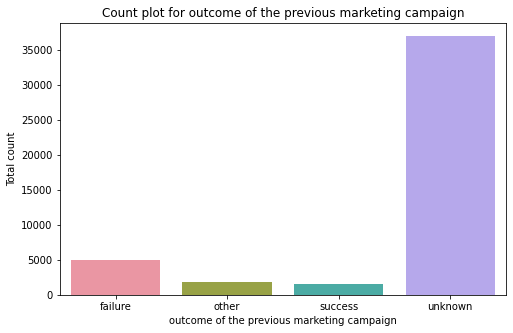

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

## Adding title and labels for x and y axis
sns.countplot(x='poutcome', data=bm) # x axis is y column.
plt.title("Count plot for outcome of the previous marketing campaign") # title of the count plot
plt.xlabel("outcome of the previous marketing campaign")
plt.ylabel("Total count")
plt.show()

The Plot clearly shows that previous marketing compaign has failed because majority of the outcome of the previous campaign is unknown very few people has subscribed for deposits in bank.

**Exploration of Categorical Features**

In [ ]:
categorical_features=[feature for feature in bm.columns if ((bm[feature].dtypes=='category') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(bm[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


features-Job and month are having highest number of categorical values

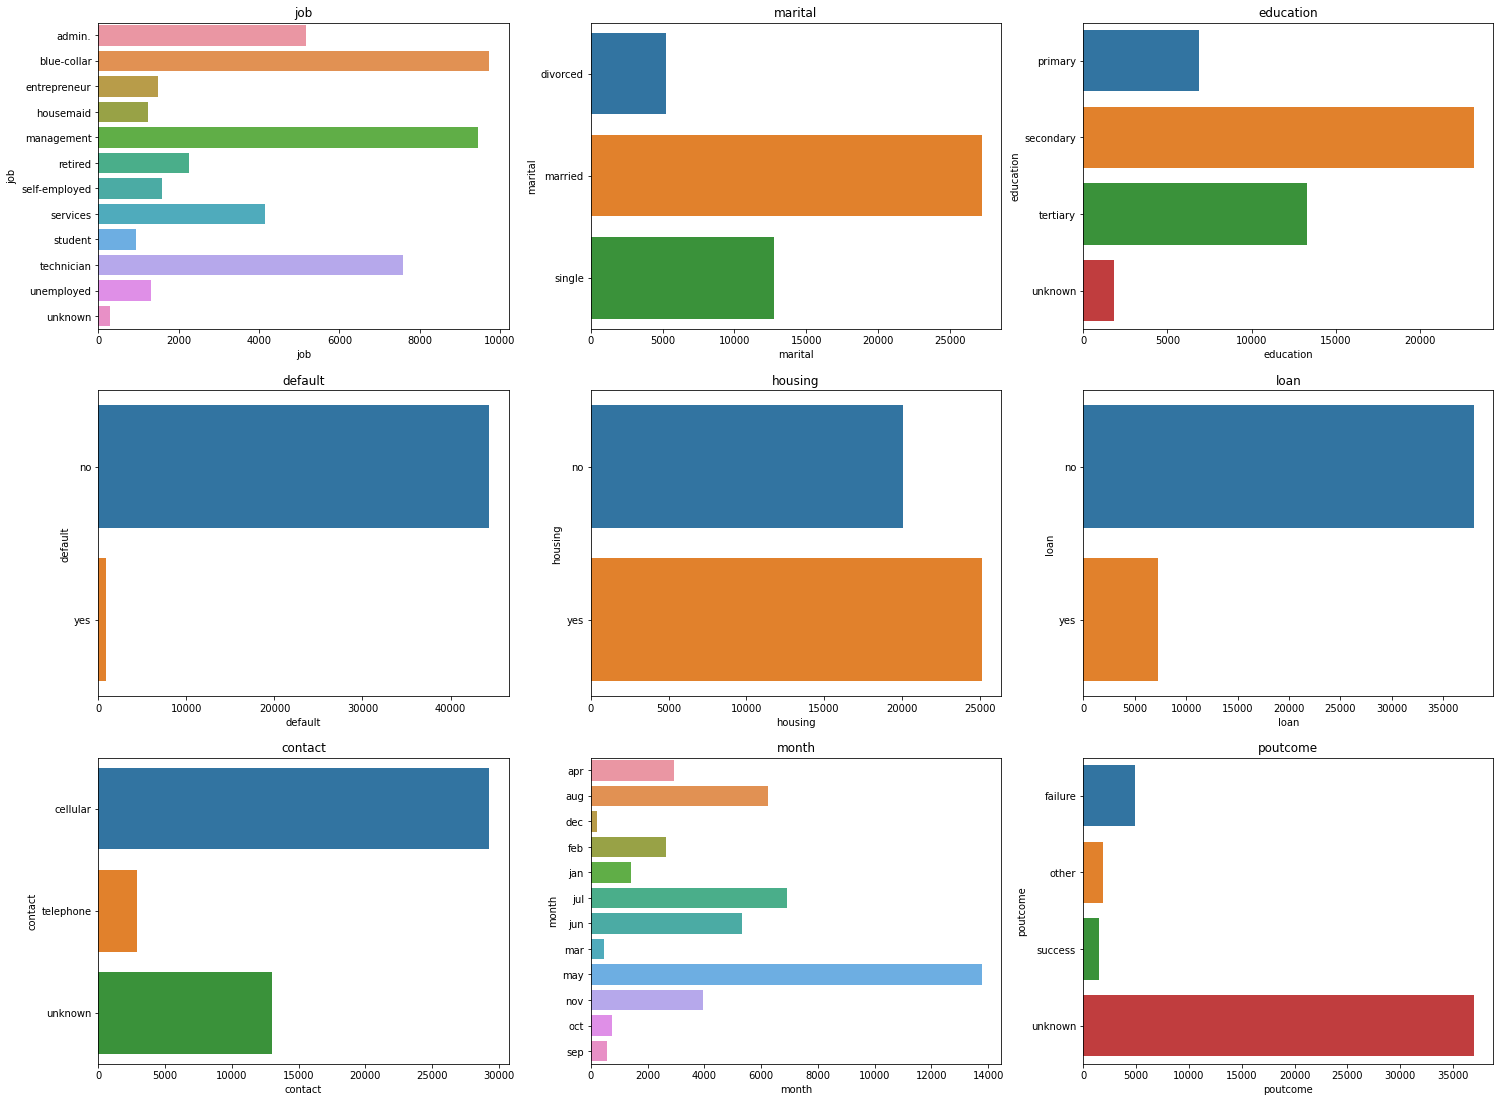

In [ ]:
# To plot all categorical features in a single plot

plt.figure(figsize=(25,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
  ax= plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=bm)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1
plt.show()

**Exploration of Numerical Features**

In [ ]:
numerical_features=[feature for feature in bm.columns if ((bm[feature].dtypes=='int64') & (feature not in ['y']))]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
for feature in numerical_features:
  print('The feature is {} and number of numerical are {}'.format(feature,len(bm[feature].unique())))

The feature is age and number of numerical are 77
The feature is balance and number of numerical are 7168
The feature is day and number of numerical are 31
The feature is duration and number of numerical are 1573
The feature is campaign and number of numerical are 48
The feature is pdays and number of numerical are 559
The feature is previous and number of numerical are 41


Features-Balance has highest number of numerial values

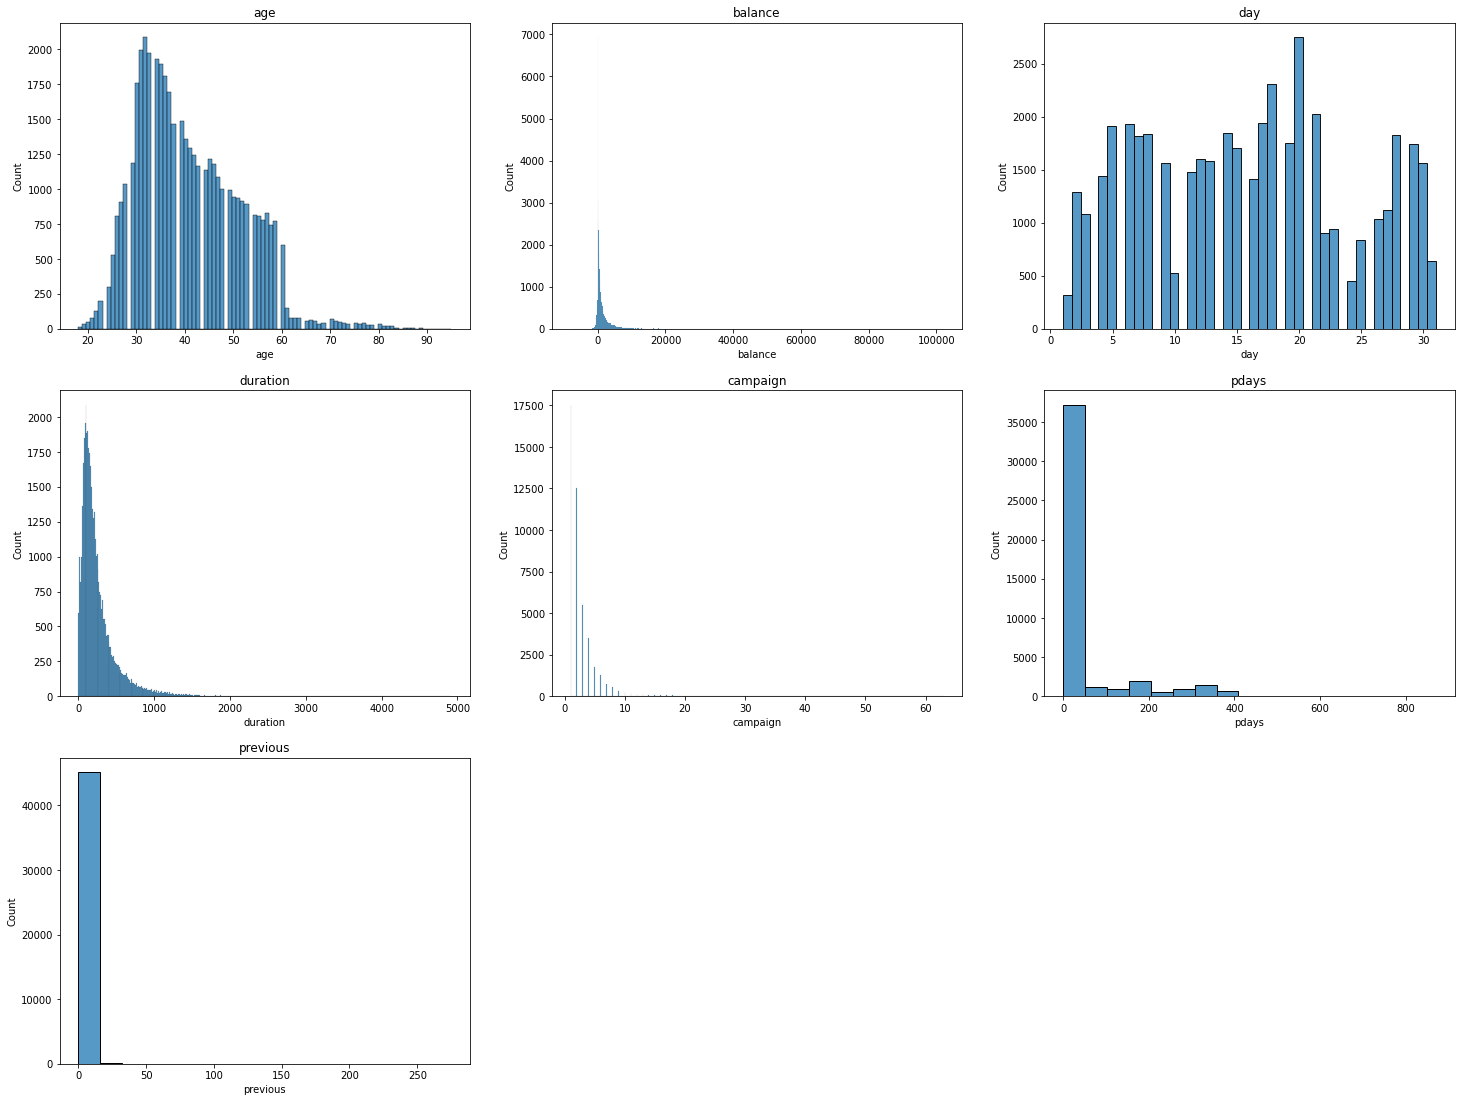

In [ ]:
# To plot all numerical features in a single plot

plt.figure(figsize=(25,80), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
  ax= plt.subplot(12,3,plotnumber)
  sns.histplot(x=numerical_feature,data=bm)
  plt.xlabel(numerical_feature)
  plt.title(numerical_feature)
  plotnumber+=1
plt.show()

Text(0.5, 0.98, 'Histogram plot for Numerical Variables')

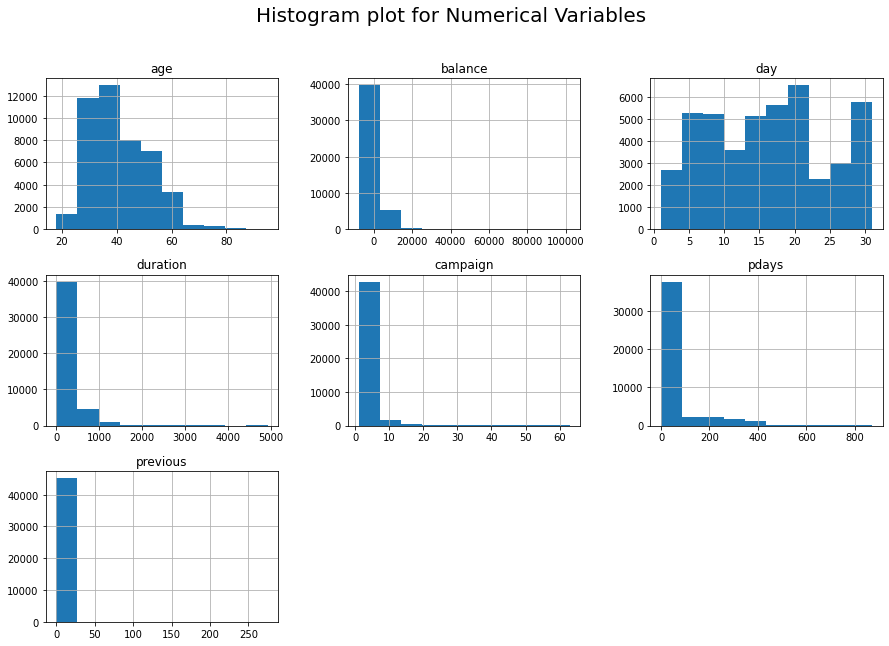

In [ ]:
bm.hist(figsize = (15,10)) # Histogram plot for Numerical Columns
plt.suptitle("Histogram plot for Numerical Variables",fontsize=20) # title of the Histogram plot

**By looking at the histogram subplots we can find analysis as below:**

**Age**- Moderately skewed towards right

**balance** - Positively Skewed or right skewed

**day**: Symmetrical

**duration** - Positively Skewed or right skewed

**campaign** - Positively Skewed or right skewed

**pdays** - Positively Skewed or right skewed

**previous** - Positively Skewed or right skewed

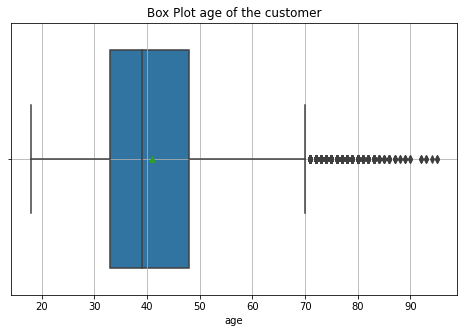

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['age'],showmeans = True)
plt.title("Box Plot age of the customer")
plt.xlabel('age')
plt.grid(True)
plt.show()

Here in the box plot of Age varible, the five point data values are below:

the minimum value is 18

Lower Quartile(Q1) is 33

median is 39

mean is 41

Upper Quartile(Q3) is 48

maximum value 95

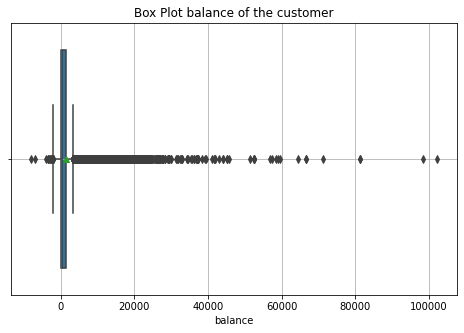

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['balance'],showmeans = True)
plt.title("Box Plot balance of the customer")
plt.xlabel('balance')
plt.grid(True)
plt.show()

Here in the box plot of balance varible, the five point data values are below:

the minimum value is -8019

Lower Quartile(Q1) is 72

median is 448

mean is 1362

Upper Quartile(Q3) is 1428

maximum value 102127

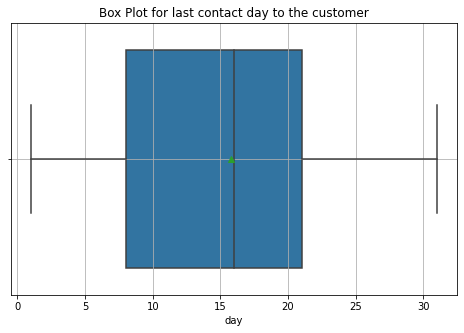

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['day'],showmeans = True)
plt.title("Box Plot for last contact day to the customer")
plt.xlabel('day')
plt.grid(True)
plt.show()

Here in the box plot of balance varible, the five point data values are below:

the minimum value is 1

Lower Quartile(Q1) is 8

median is 16

mean is 16

Upper Quartile(Q3) is 21

maximum value 31

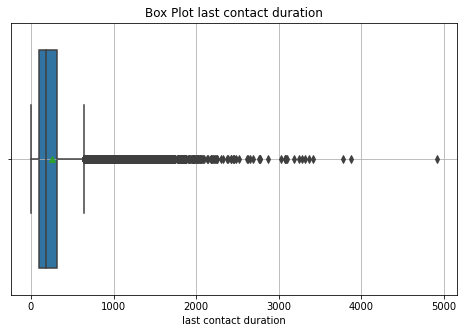

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['duration'],showmeans = True)
plt.title("Box Plot last contact duration")
plt.xlabel('last contact duration')
plt.grid(True)
plt.show()

Here in the box plot of duration varible, the five point data values are below:

the minimum value is 0

Lower Quartile(Q1) is 103

median is 180

mean is 258

Upper Quartile(Q3) is 3119

maximum value 4918

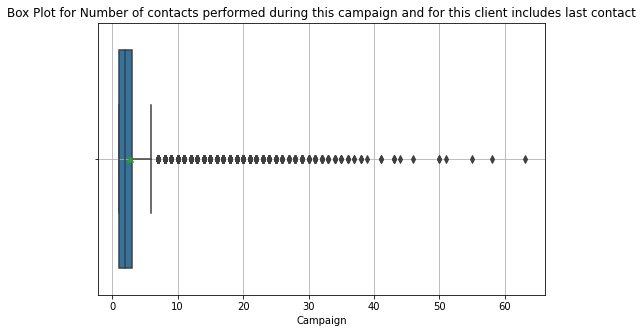

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['campaign'],showmeans = True)
plt.title("Box Plot for Number of contacts performed during this campaign and for this client includes last contact")
plt.xlabel('Campaign')
plt.grid(True)
plt.show()

Here in the box plot of campaign varible, the five point data values are below:

the minimum value is 1

Lower Quartile(Q1) is 1

median is 2

mean is 3

Upper Quartile(Q3) is 3

maximum value 63

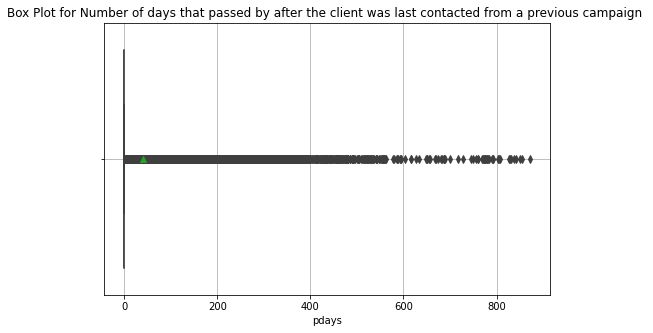

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['pdays'],showmeans = True)
plt.title("Box Plot for Number of days that passed by after the client was last contacted from a previous campaign ")
plt.xlabel('pdays')
plt.grid(True)
plt.show()

Here in the box plot of pdays varible, the five point data values are below:

the minimum value is -1

Lower Quartile(Q1) is -1

median is -1

mean is 40

Upper Quartile(Q3) is -1

maximum value 871

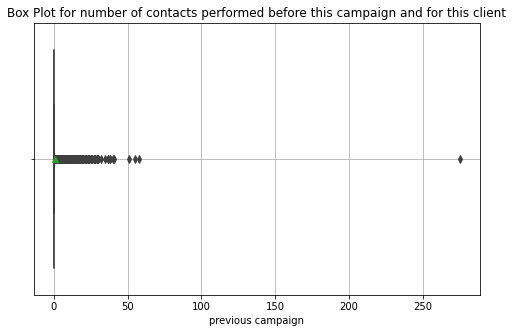

In [ ]:
# Marking figures size. 
plt.figure(figsize=(8,5))

sns.boxplot(bm['previous'],showmeans = True)
plt.title("Box Plot for number of contacts performed before this campaign and for this client")
plt.xlabel('previous campaign')
plt.grid(True)
plt.show()

Here in the box plot of previous varible, the five point data values are below:

the minimum value is 0

Lower Quartile(Q1) is 0

median is 0

mean is 0.6

Upper Quartile(Q3) is 0

maximum value 275

In [ ]:
bm.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Treating Variables with skewness**

In [ ]:
bm.columns # Columns in dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bm.skew() # to find skewness value of all columns in dataset

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Skewness**

- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

*   Now we can clearly check that balance, duration, campaign, pdays and previous columns are highly skewed. 

*   Only Age variable is moderately skewed.

*   day last contacted to the client is symmetrical



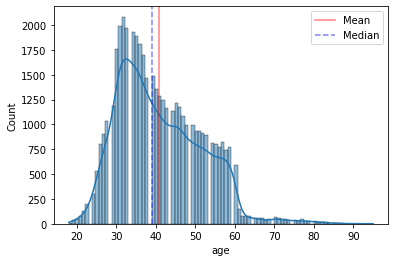

In [ ]:
sns.histplot(data = bm['age'], kde = True)
plt.axvline(x=bm.age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=bm.age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

*Log Transformation*

In [ ]:
#create log-transformed data
bm['age_log'] = np.log(bm['age'])

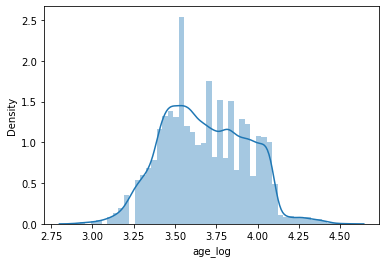

In [ ]:
sns.distplot(bm['age_log'])

In Log Transformation, still is not symmetrical.

*Square Root Transformation*

In [ ]:
# Square root transformation
bm['age_sqrt'] = np.sqrt(bm['age'])

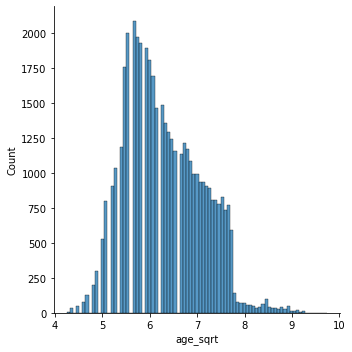

In [ ]:
sns.displot(bm['age_sqrt'])

In Square root Transformation, still is not symmetrical.

*Cube Root Transformation*

In [ ]:
# Cube root transformation
bm['age_cbrt'] = np.cbrt(bm['age'])

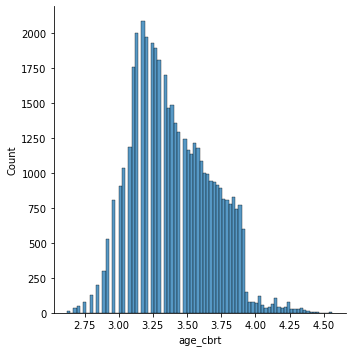

In [ ]:
sns.displot(bm['age_cbrt'])

In Cube root Transformation, it is symmetrical.

**Bivariate Analysis**

**Box Plot of categorical variables and it's relationship with outcome y variable**(Categorical-Categorical Data)

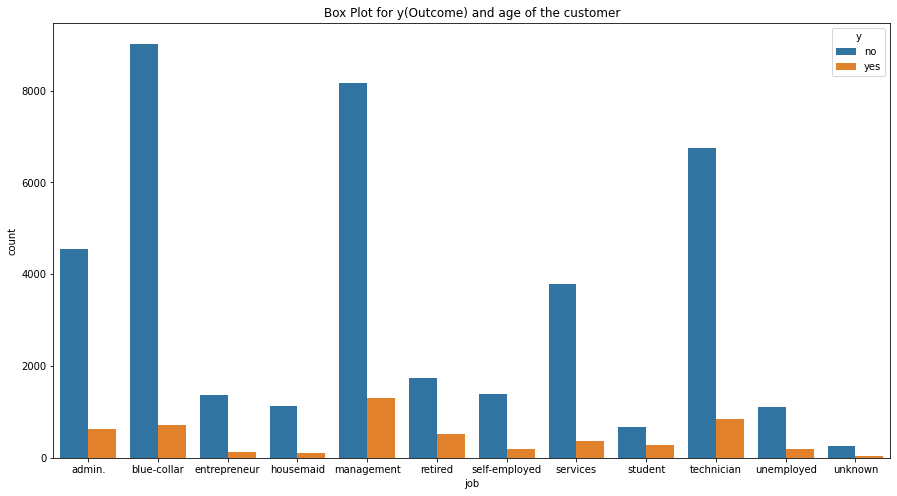

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.countplot(x='job',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and age of the customer")
plt.xlabel('job')
plt.show()

If we observe client's in category of management has subscribed for term deposits when compared to all and clients in blue-collar are maximum in no class.

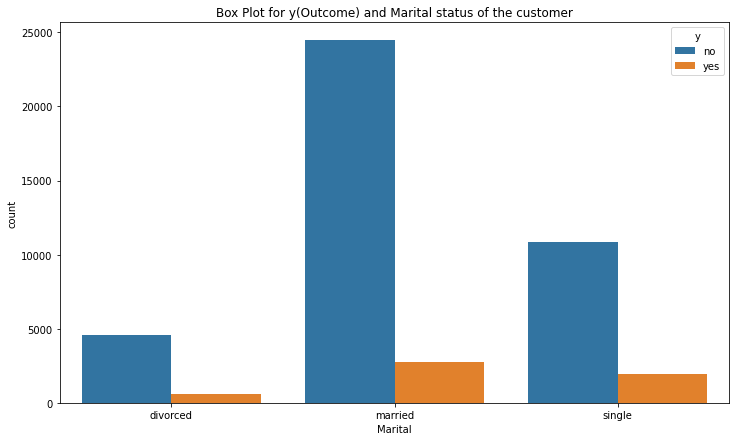

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='marital',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and Marital status of the customer")
plt.xlabel('Marital')
plt.show()

If we observe people who are married are the category who has subscribed for term deposits and divorced category client's are not shown interest in term deposits.

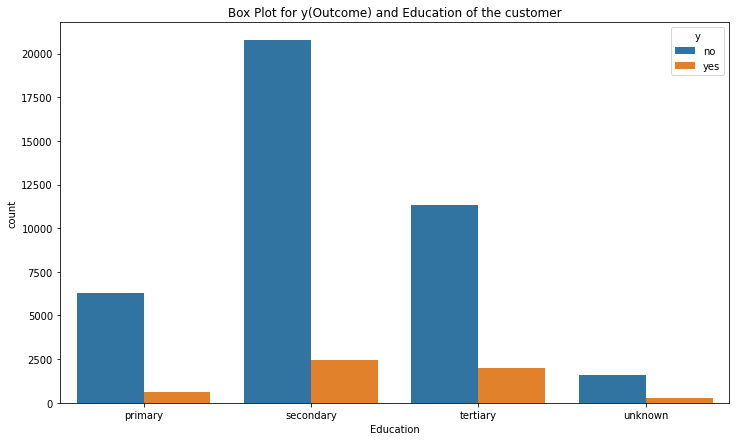

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='education',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and Education of the customer")
plt.xlabel('Education')
plt.show()

People with secondary degree as education qualification are the most who have subscribed for the deposits. They are also the most who have not subscribed for deposits.



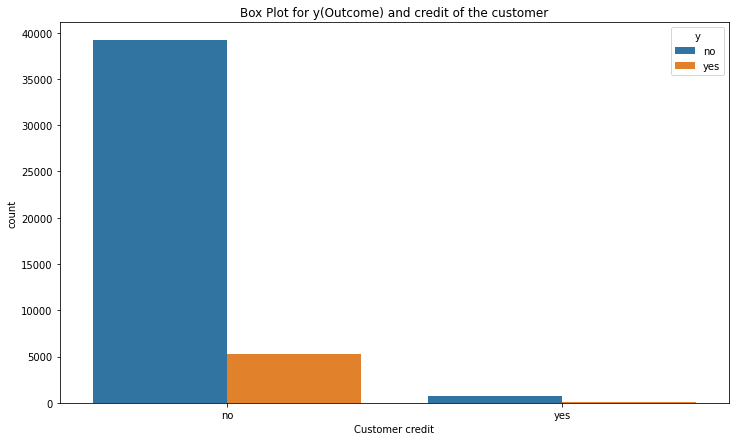

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='default',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and credit of the customer")
plt.xlabel('Customer credit')
plt.show()

If we observe customer credit plot with outcome variable no class ratio is high when compared to yes ratio who are showing interest in term deposits.

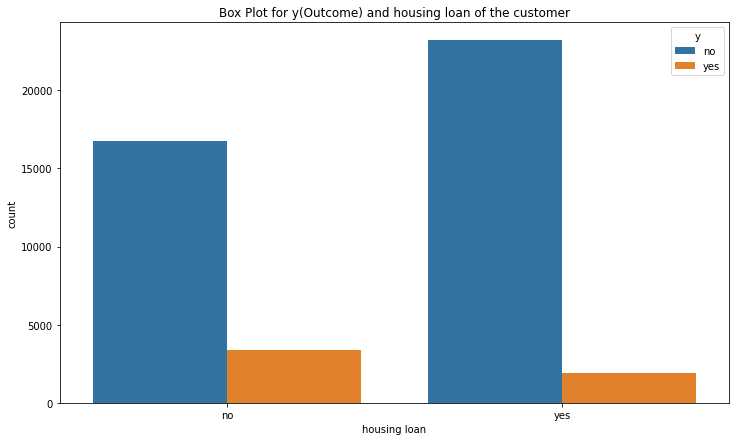

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='housing',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and housing loan of the customer")
plt.xlabel('housing loan')
plt.show()

People with housing loan are the most ones who have subscribed for deposits. They are also the most ones who have not subscribed for the deposits.

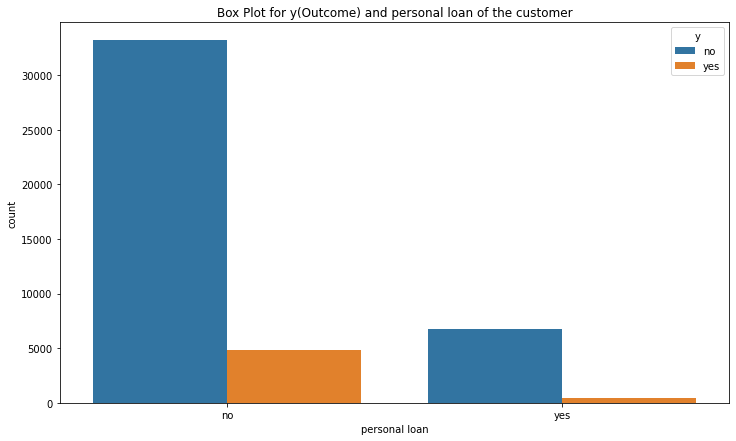

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='loan',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and personal loan of the customer")
plt.xlabel('personal loan')
plt.show()

People with no personal loan are the most ones who have not subscribed for the deposits offered by the bank. People with no personal loan are the most ones also who have subscribed for the deposits. 

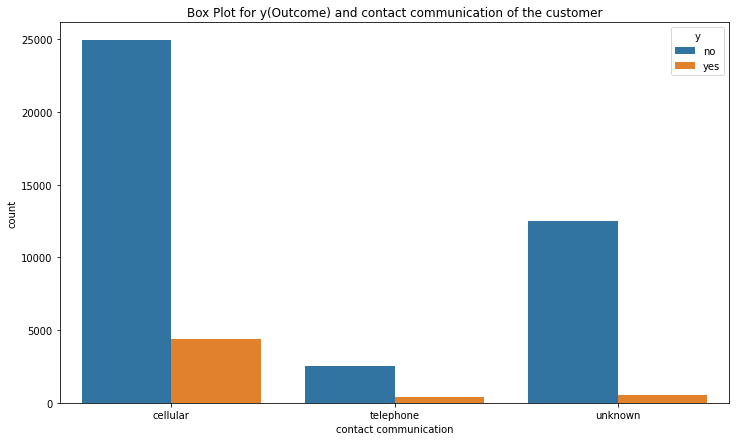

In [ ]:
# Marking figures size. 
plt.figure(figsize=(12,7))

sns.countplot(x='contact',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and contact communication of the customer")
plt.xlabel('contact communication')
plt.show()

More people contacted on cellular by bank have subscribed the deposits offered by the bank than the ones contacted on telephone.

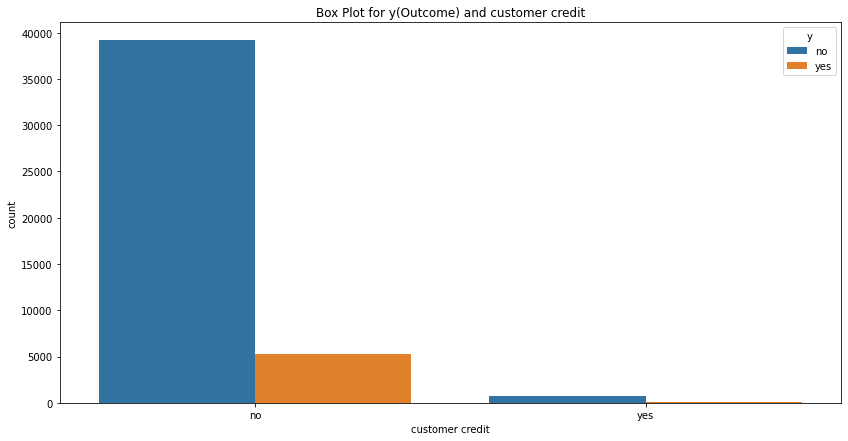

In [ ]:
# Marking figures size. 
plt.figure(figsize=(14,7))

sns.countplot(x='default',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and customer credit")
plt.xlabel('customer credit')
plt.show()

People with default status as no are the most one’s who have and have not subscribed for bank deposits.



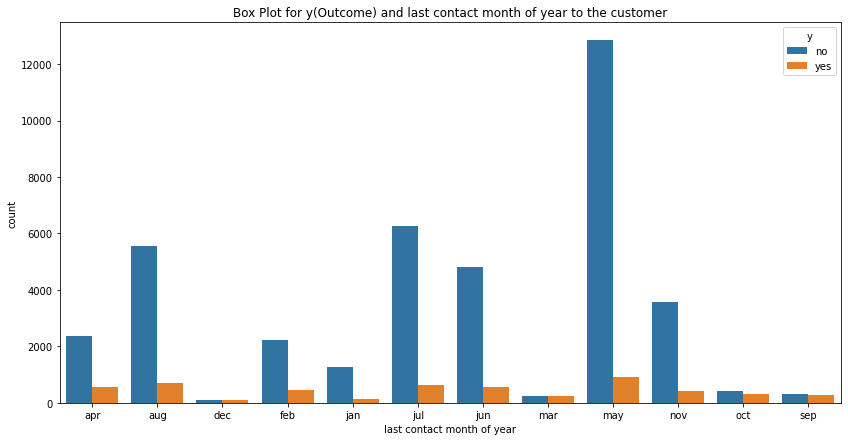

In [ ]:
# Marking figures size. 
plt.figure(figsize=(14,7))

sns.countplot(x='month',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and last contact month of year to the customer")
plt.xlabel('last contact month of year')
plt.show()

People contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of December, March, September,October and have almost equal chances for subscribing the deposits or not.

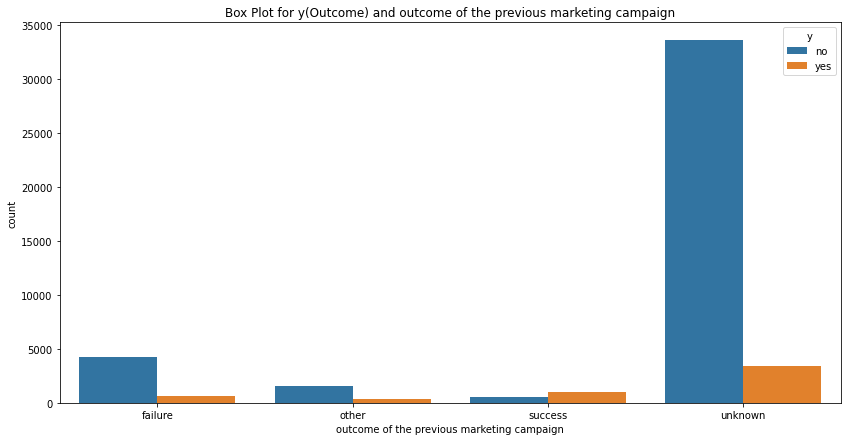

In [ ]:
# Marking figures size. 
plt.figure(figsize=(14,7))

sns.countplot(x='poutcome',hue='y',data=bm)
plt.title("Box Plot for y(Outcome) and outcome of the previous marketing campaign")
plt.xlabel('outcome of the previous marketing campaign')
plt.show()

From the above plot, people whose previous outcome is unknown have actually subscribed more than any other group of people belonging to previous outcome. Among the group of people with previous outcome as success, people have actually subscribed more for the deposits than people who have not subscribed for the deposits.

***Box Plot for the Numerical Variables and it's relationship with outcome variable 'y'.***

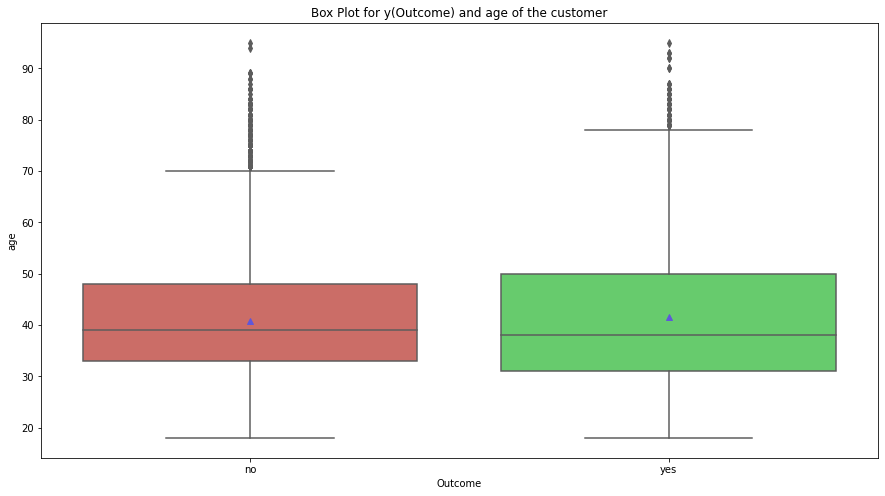

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='age', data=bm,showmeans = True)
plt.title("Box Plot for y(Outcome) and age of the customer")
plt.xlabel('Outcome')
plt.ylabel('age')
plt.show()

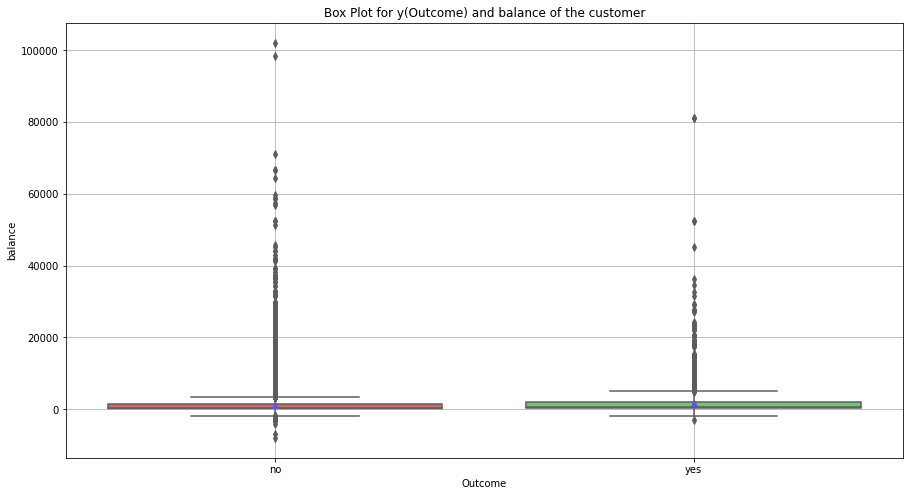

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='balance', data=bm,showmeans = True)
plt.title("Box Plot for y(Outcome) and balance of the customer")
plt.xlabel('Outcome')
plt.ylabel('balance')
plt.grid(True)
plt.show()

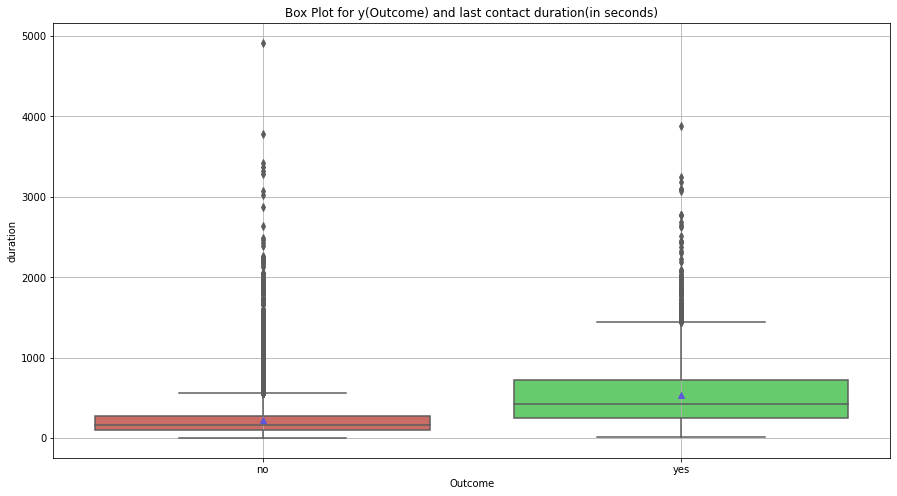

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='duration', data=bm,showmeans = True)
plt.title("Box Plot for y(Outcome) and last contact duration(in seconds)")
plt.xlabel('Outcome')
plt.ylabel('duration')
plt.grid(True)
plt.show()

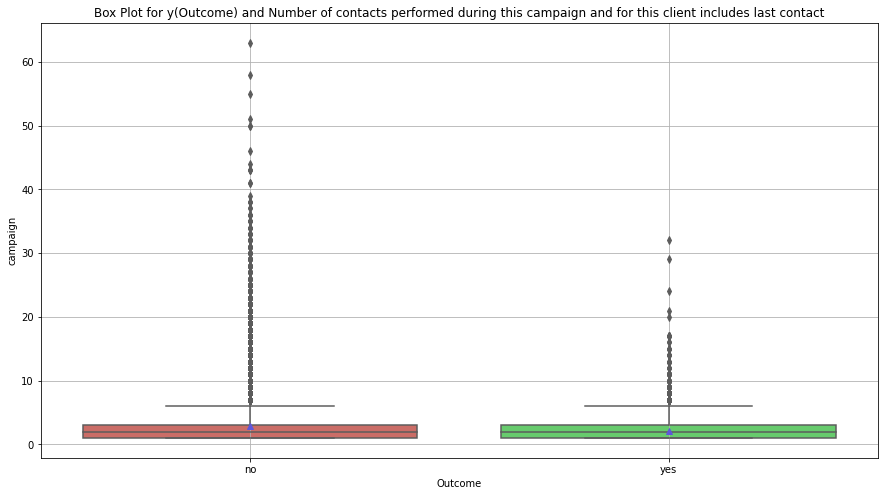

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='campaign', data=bm,showmeans = True)
plt.title("Box Plot for y(Outcome) and Number of contacts performed during this campaign and for this client includes last contact")
plt.xlabel('Outcome')
plt.ylabel('campaign')
plt.grid(True)
plt.show()

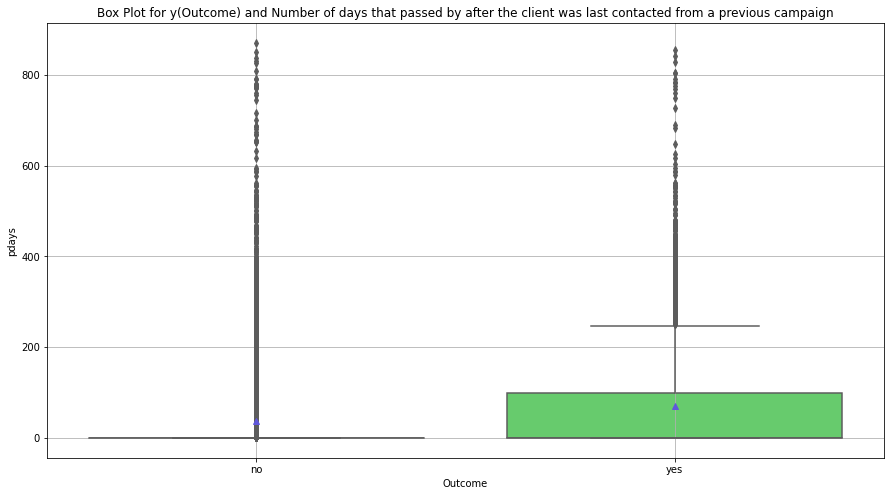

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='pdays', data=bm,showmeans = True)
plt.title("Box Plot for y(Outcome) and Number of days that passed by after the client was last contacted from a previous campaign")
plt.xlabel('Outcome')
plt.ylabel('pdays')
plt.grid(True)
plt.show()

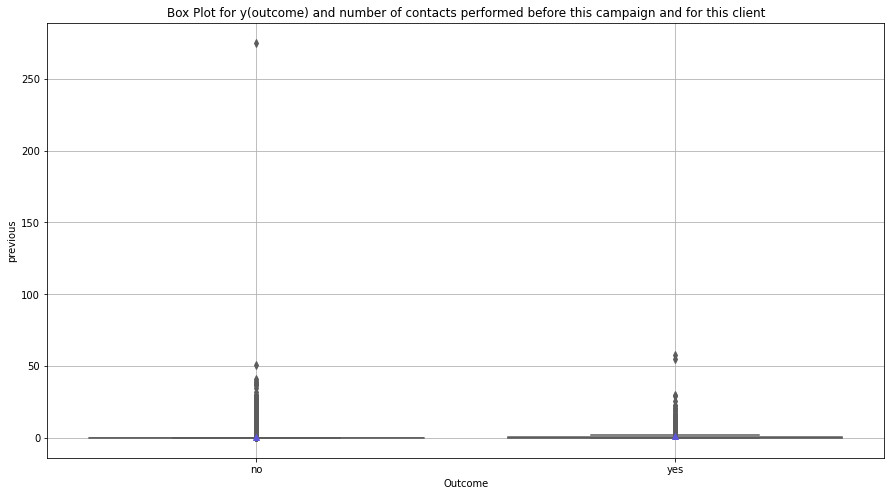

In [ ]:
# Marking figures size. 
plt.figure(figsize=(15,8))

sns.boxplot(x='y', y='previous', data=bm,showmeans = True)
plt.title("Box Plot for y(outcome) and number of contacts performed before this campaign and for this client")
plt.xlabel('Outcome')
plt.ylabel('previous')
plt.grid(True)
plt.show()

*If we observe in the box plot all numerical variables has outliers and higly skewed.*

**Multivariate Analysis**

In [27]:
bm1=bm.copy()

In [33]:
bm1['y'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [34]:
bm1.value_counts('y')

y
0    39922
1     5289
dtype: int64

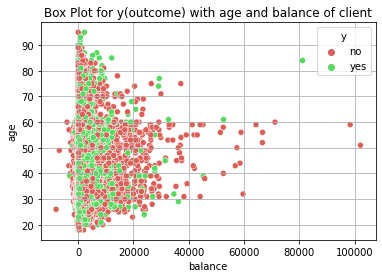

In [113]:
# use the function regplot to make a scatterplot
sns.scatterplot(x= "balance", y= "age",hue='y', data = bm)

plt.title("Box Plot for y(outcome) with age and balance of client")
plt.xlabel('balance')
plt.ylabel('age')
plt.grid(True)  
# To show the plot
plt.show()

If we observe the scatter plot for age group of people who are in range of 30-60 and having balance below 20k are more in count who subscribed for term deposit

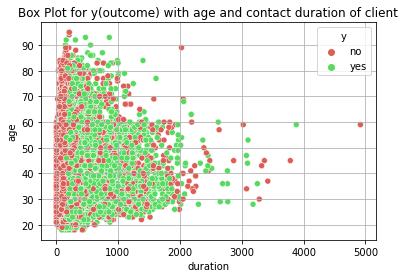

In [112]:
# use the function regplot to make a scatterplot
sns.scatterplot(x= "duration", y= "age",hue='y', data = bm)

plt.title("Box Plot for y(outcome) with age and contact duration of client")
plt.xlabel('duration')
plt.ylabel('age')
plt.grid(True)  
  
# To show the plot
plt.show()

If we observe plot if duration of contact is high of abve 20 years of age there are more chances of client subscribing to term deposit.

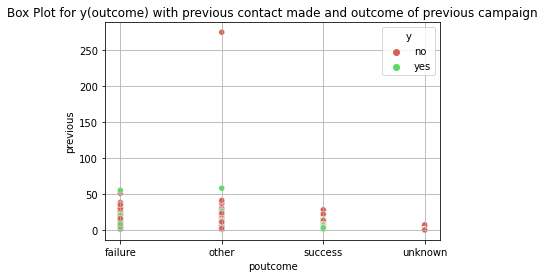

In [111]:
# use the function regplot to make a scatterplot
sns.scatterplot(x= "poutcome", y= "previous", hue='y',data = bm)

plt.title("Box Plot for y(outcome) with previous contact made and outcome of previous campaign")
plt.xlabel('poutcome')
plt.ylabel('previous')
plt.grid(True)  
# To show the plot
plt.show()

If we see the plot number of contacts performed before this campaign and for this client who are close to 50 times are subscribed to term deposits.

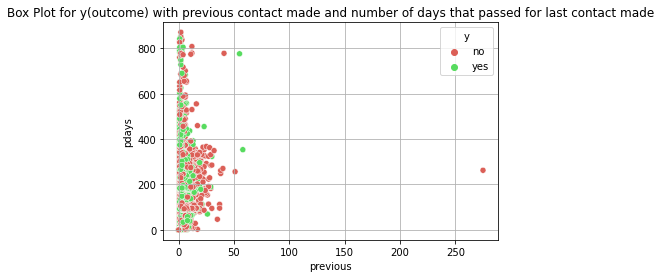

In [110]:
# use the function regplot to make a scatterplot
sns.scatterplot(x= "previous", y= "pdays", hue='y',data = bm)

plt.title("Box Plot for y(outcome) with previous contact made and number of days that passed for last contact made")
plt.xlabel('previous')
plt.ylabel('pdays')
plt.grid(True)  
  
# To show the plot
plt.show()

If we observe the plot, the less the number of days that passed by after the client was last contacted from a previous campaign are more subscribed to term deposits.

**Categorical Variables:**                   
1. Job
2. Marital
3. Education
4. Default
5. Housing
6. Loan
7. Contact
8. day
9. month
10. poutcome
11. y

---
**Numerical Variables:**
1. Age
2. Balance
3. Duration
4. Campaign
5. Pdays
6. Previous




In [93]:
print(bm.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


Selecting the appropriate features.

**Removing unwanted variables:**
The following features will be removed due to do not represent an impact over the dataset.

Drop features: ["month", "previous", "day", "pdays"].

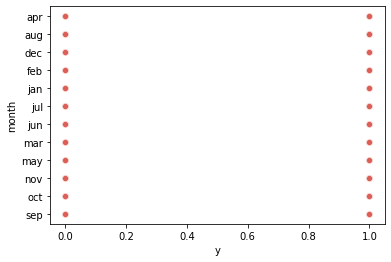

In [104]:
sns.scatterplot(x='y',y='month',data=bm1)

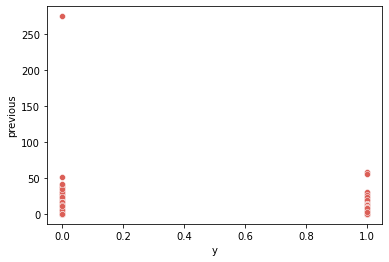

In [103]:
sns.scatterplot(x='y',y='previous',data=bm1)

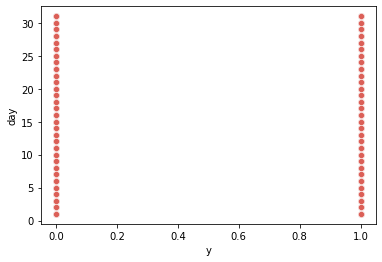

In [102]:
sns.scatterplot(x='y',y='day',data=bm1)

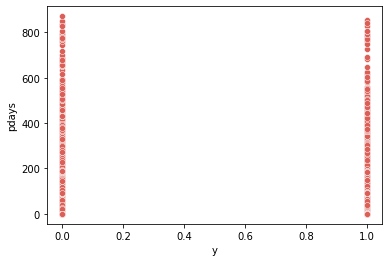

In [101]:
sns.scatterplot(x='y',y='pdays',data=bm1)

These four variables does not effect much on outcome variable so dropping them.

In [105]:
# b. Drop unrepresentative features
bm1.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
print(bm1)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  duration  campaign poutcome  y  


In [106]:
bm1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'poutcome', 'y'],
      dtype='object')

**Transforming - Encoding:**

*Encoding categorical features:* encodes categorical variables into 1s and 0s (yes and no become 1 and 0). When the feature has more than two variables to encode: "marital": married, single, divorced become [1,0,0],[0,1,0], [0,0,1]. For this case is used pd.get_dummies(train["Column_names_here"])

In [108]:
# a. Encoding categorical features.
bm1['default'] = bm1['default'].map({'yes': 1, 'no': 0})
bm1['housing'] = bm1['housing'].map({'yes': 1, 'no': 0})
bm1['loan'] = bm1['loan'].map({'yes': 1, 'no': 0})
bm1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,unknown,0


So Finally, we conclude that Age, Job, marital, education, default, balance, housing, loan, contact, duration, campaign and poutcome are the major factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit.        



In [115]:
# Downloading cleaned data
from google.colab import files

bm1.to_csv('bank_mrktng.csv', encoding = 'utf-8-sig') 
files.download('bank_mrktng.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>